In [1]:
import os
import pandas as pd
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
import itertools as it
import sys
sys.path.append("../src")
import utils as ut

In [2]:
meta_file = "../../1_data_download/in_house/meta_data/metadata.json" 
peak_dir = "../../4_peak_call/data"
lib_name = "control"

In [3]:
lib_args = ut.create_args(meta_file, lib_name)

In [4]:
peakcall_methods = ["starrpeaker", "cradle", "macs2", "deseq2"]
peak_files = [ut.get_peak_file(peak_dir, lib_args.library_short, m) for m in peakcall_methods]

In [5]:
def store_cradle_activated_peaks(cradle_peak_file):
    cradle_peak_activated_file = cradle_peak_file + "_activated.bed"
    df = pd.read_csv(cradle_peak_file, sep="\t")
    df =  df.loc[df.effectSize>0]
    df =  df.iloc[:, 0:6]
    df.to_csv(cradle_peak_activated_file, sep="\t",  header=False, index=False)
    return cradle_peak_activated_file


In [6]:
new_cradle_file = store_cradle_activated_peaks(peak_files[1])
peak_files[1] = new_cradle_file

In [7]:
peak_beds = list(map(ut.read_bed, peak_files))

In [8]:
subset_dict = dict()

def get_intersecting_peaks_num(peak_beds, prod):
    sign = [-1 if p==0 else 1 for p in prod]
    sign_dict = {idx: s for idx,s in zip(range(len(prod)), sign)}
    # get the positive signs first
    sign_dict = dict(sorted(sign_dict.items(), key=lambda item:item[1], reverse=True))
    for i, (k,v) in enumerate(sign_dict.items()):
        if i == 0:
            assert v==1
            final_bed = peak_beds[k]
        else:
            if v==-1:
                final_bed -= peak_beds[k]
            else:
                assert v==1
                final_bed += peak_beds[k]
    return len(final_bed)

for prod in list(it.product([0, 1], repeat=4)):
    if all(p == 0 for p in prod):
        continue
    else:
        subset_dict["".join(list(map(str, prod)))] = get_intersecting_peaks_num(peak_beds, prod)


In [9]:
import venn

# Figure 3C

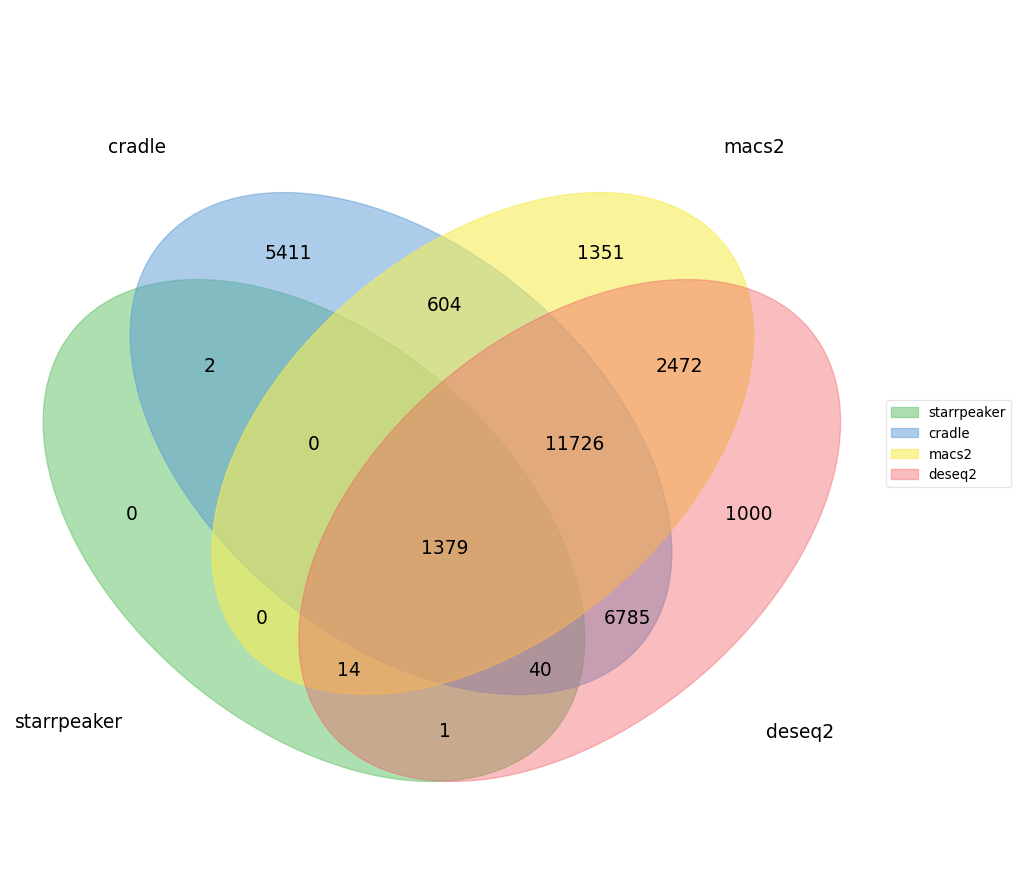

In [10]:
fig, ax = venn.venn4(subset_dict, names=peakcall_methods)
fig.show()

In [38]:
import pybedtools
pybedtools.helpers.cleanup(remove_all=True)